# Correlations after clustering ASVs into OTUs

Given the difficulty of running correlations using very sparse ASV table generated with dada2 (min quality 20, only forward reads), we decided to try the clustering approach to group ASVs into OTUs. This comprises a higher level of resolution that could potentially work.

Qiime2 has nice tutorial on how to do this.

#### Rarefying tables

In [ ]:
import pandas as pd

denovo_97_q20_fw_feature_table_df = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Qiime2/clustering/q20_forward/denovo_97/dn-wallace2018_forward_q20-97_feature-table/denovo_97_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

denovo_97_q20_fw_feature_table_df.rename(columns={'OTU ID': 'Name'}, inplace=True)
denovo_97_q20_fw_feature_table_df.set_index('Name', inplace=True)

denovo_97_q20_fw_feature_table_df.head()

In [ ]:
import matplotlib.pyplot as plt
denovo_97_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].plot.box()
plt.title('Boxplot of Column Sums')
plt.ylabel('Sum')
plt.show()

In [ ]:
denovo_97_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].quantile(0.25)


In [ ]:
import pandas as pd

denovo_99_q20_fw_feature_table_df = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Qiime2/clustering/q20_forward/denovo_99/dn-wallace2018_forward_q20-99_feature-table/denovo_99_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

denovo_99_q20_fw_feature_table_df.rename(columns={'OTU ID': 'Name'}, inplace=True)
denovo_99_q20_fw_feature_table_df.set_index('Name', inplace=True)

denovo_99_q20_fw_feature_table_df.head()

In [ ]:
import matplotlib.pyplot as plt
denovo_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].plot.box()
plt.title('Boxplot of Column Sums')
plt.ylabel('Sum')
plt.show()

In [ ]:
denovo_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].quantile(0.25)

In [ ]:
import pandas as pd

cr_99_q20_fw_feature_table_df = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Qiime2/clustering/q20_forward/close_ref_99/cr-wallace2018_forward_q20-99_feature-table/cr99_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

cr_99_q20_fw_feature_table_df.rename(columns={'OTU ID': 'Name'}, inplace=True)
cr_99_q20_fw_feature_table_df.set_index('Name', inplace=True)

cr_99_q20_fw_feature_table_df.head()

In [ ]:
import matplotlib.pyplot as plt
cr_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[103:].plot.box()
plt.title('Boxplot of Column Sums')
plt.ylabel('Sum')
plt.show()

In [ ]:
cr_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].quantile(0.25)

In [ ]:
import pandas as pd

or_99_q20_fw_feature_table_df = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Qiime2/clustering/q20_forward/open_ref_99/or-wallace2018_forward_q20-99_feature-table/or99_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

or_99_q20_fw_feature_table_df.rename(columns={'OTU ID': 'Name'}, inplace=True)
or_99_q20_fw_feature_table_df.set_index('Name', inplace=True)

or_99_q20_fw_feature_table_df.head()

In [ ]:
import matplotlib.pyplot as plt
or_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].plot.box()
plt.title('Boxplot of Column Sums')
plt.ylabel('Sum')
plt.show()

In [ ]:
or_99_q20_fw_feature_table_df.sum().sort_values(ascending=False)[85:].quantile(0.25)

#### Rarefying tables

| Clustering strategy | Min sample size |
|---------------------|-----------------|
| de novo 97 | 15296.5 |
| de novo 99 | 15296.5 |
| closed ref 99 | 13413.5 |
| open ref 99 | 15296.5 |

## Correlations with OTUs at 99% using SILVA (closed reference)


In [1]:
kremling_expression_key = '/media/renato/SSD1TB/Repositories/maize_microbiome_transcriptomics/correlations_rnaseq_metataxonomics/0_kremling_expression_key.txt'
sra_run_table_16s = '/media/renato/SSD1TB/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/SraRunInfo_Wallace_etal_2018.csv'
sra_run_table_rnaseq = '/media/renato/SSD1TB/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/run_info/SraRunInfo_Kremling_etal_2018.csv'
#kremling_expression_key = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/correlations_rnaseq_metataxonomics/0_kremling_expression_key.txt'
#sra_run_table_16s = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/SraRunInfo_Wallace_etal_2018.csv'
#sra_run_table_rnaseq = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/run_info/SraRunInfo_Kremling_etal_2018.csv'

dict_wallace_kremling_2018 = {}
kremling_expression_key_dict = {}

In [2]:
with open(kremling_expression_key, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split('\t')
        
        kremling_identifier = fields[0]
        wallace_identifier = fields[1]

        kremling_expression_key_dict[kremling_identifier] = wallace_identifier

In [3]:
import re

with open(sra_run_table_rnaseq, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split(',')
        fields2 = fields[11].split('_')
        rnaseq_run_id = fields[0]
        sample_id = fields2[1]
        rnaseq_genotype = fields2[2]
        day = ''
        match = re.search(r'\d+', sample_id)
        unmatched_parts = re.split(r'\d+', sample_id)
        day_period = unmatched_parts[0]
        if match:
            day = int(match.group())
        if sample_id.startswith('LMA') and rnaseq_genotype != '#N/A':
            dict_wallace_kremling_2018[fields[11]] = {'run_accession_16s': '',
                                    'run_accession_rnaseq': rnaseq_run_id,
                                    'day': day,
                                    'day_period': day_period,
                                    'genotype_16s': '',
                                    'genotype_rnaseq': rnaseq_genotype}

In [4]:
rnaseq_samples_with_16s = 0

with open(sra_run_table_16s, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split(',')
        fields2 = fields[11].split('.')
        metataxonomics_run_id = fields[0]
        day = int(fields2[1])
        day_period = fields2[0]
        for key, value in kremling_expression_key_dict.items():
            if value == fields[11]:
                if dict_wallace_kremling_2018[key]['day'] != day:
                    print('Big problem!')
                    print(day, dict_wallace_kremling_2018[key]['day'])
                    print(dict_wallace_kremling_2018[key])
                    print(value, fields[11], key)
                    exit(1)
                if dict_wallace_kremling_2018[key]['day_period'] != day_period:
                    print('Big problem!')
                    if key == '10343927_LMAN8_CML505_CAACAG':
                        #print("It's ok. I know this sample is problematic.")
                        continue
                    else:
                        print(day_period, dict_wallace_kremling_2018[key]['day_period'])
                        print(dict_wallace_kremling_2018[key])
                        print(value, fields[11], key)
                        exit(1)
                dict_wallace_kremling_2018[key]['run_accession_16s'] = metataxonomics_run_id
                rnaseq_samples_with_16s+=1

print(f'{rnaseq_samples_with_16s} sample pairs found.')

Big problem!
484 sample pairs found.


In [5]:
no_16s = 0
for key, value in dict_wallace_kremling_2018.items():
    if value['run_accession_16s'] == '':
        print(key, value)
        no_16s+=1
print(f'{no_16s} samples without 16S data.')

10343927_LMAN8_B73_CACACT {'run_accession_16s': '', 'run_accession_rnaseq': 'SRR5909633', 'day': 8, 'day_period': 'LMAN', 'genotype_16s': '', 'genotype_rnaseq': 'B73'}
10343927_LMAN8_CML505_CAACAG {'run_accession_16s': '', 'run_accession_rnaseq': 'SRR5911345', 'day': 8, 'day_period': 'LMAN', 'genotype_16s': '', 'genotype_rnaseq': 'CML505'}
2 samples without 16S data.


In [6]:
run2my_sample_id = {}

for key in dict_wallace_kremling_2018:
    if dict_wallace_kremling_2018[key]['run_accession_rnaseq']:
        run2my_sample_id[dict_wallace_kremling_2018[key]['run_accession_rnaseq']] = key
    if dict_wallace_kremling_2018[key]['run_accession_16s']:
        run2my_sample_id[dict_wallace_kremling_2018[key]['run_accession_16s']] = key

In [7]:
import pandas as pd

# Importing expression data from Kremling et al. 2018 (TPM matrix on Maize v5 using Salmon after cleaning with cutadapt)
#kremling_expression_v5 = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/RNAseq/Salmon/Zma2_tpm_matrix.txt', sep='\t')
kremling_expression_v5 = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/RNAseq/Salmon/Zma2_tpm_matrix.txt', sep='\t')

# Rename column and reset the index
kremling_expression_v5.set_index('Name', inplace=True)

# Print the dataframe
kremling_expression_v5.head()

,SRR5909626,SRR5909627,SRR5909633,SRR5909635,SRR5909639,SRR5909642,SRR5909645,SRR5909653,SRR5909655,SRR5909665,...,SRR5912073,SRR5912081,SRR5912082,SRR5912083,SRR5912093,SRR5912094,SRR5912104,SRR5912105,SRR5912111,SRR5912116
Name,,,,,,,,,,,,,,,,,,,,,
Zm00001eb371370_T002,1.04145,0.0000,3.391060,0.0,0.0000,1.82712,0.284514,2.23201,0.437147,0.468934,...,0.00000,1.51042,0.00000,0.0,0.00000,2.82055,3.96967,0.00000,2.96105,0.00000
Zm00001eb371350_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371330_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371310_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371280_T001,1.27650,2.1092,0.692731,0.0,4.2798,1.47496,2.557320,0.00000,1.065940,1.149530,...,3.02253,0.41140,1.17447,0.0,3.48749,9.47506,6.19189,3.80776,1.03695,1.14981


In [8]:
# Rename the columns using the dictionary
kremling_expression_v5 = kremling_expression_v5.rename(columns=run2my_sample_id)
kremling_expression_v5.columns = [str(x) for x in kremling_expression_v5.columns]

kremling_expression_v5.head()

,10343927_LMAD26_CI21E_AAGTGG,10343264_LMAN26_CI21E_ATGAAC,10343927_LMAN8_B73_CACACT,10343264_LMAN26_B64_ACCAGT,10343262_LMAN8_B109_TGCTAT,10343262_LMAN8_B14A_CTCTCG,10343262_LMAN8_B57_CCTAAG,10343927_LMAD26_B77_TAATCG,10343262_LMAN8_B79_GCAGCC,10343927_LMAN8_CI187-2_GACGAT,...,10344826_LMAN8_I29_ACGTCT,10344823_LMAD8_IA2132_ACACGC,10343264_LMAD26_CML91_AACGCC,10344827_LMAN26_CML91_AATCCG,10344827_LMAN26_Ki21_AAGACA,10343927_LMAD26_Ki21_ACGTCT,10344826_LMAD8_E2558W_CGCAAC,10343927_LMAN8_E2558W_GAACCT,10344826_LMAD8_IDS69_CAGGAC,10343927_LMAN8_IDS69_ACATTA
Name,,,,,,,,,,,,,,,,,,,,,
Zm00001eb371370_T002,1.04145,0.0000,3.391060,0.0,0.0000,1.82712,0.284514,2.23201,0.437147,0.468934,...,0.00000,1.51042,0.00000,0.0,0.00000,2.82055,3.96967,0.00000,2.96105,0.00000
Zm00001eb371350_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371330_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371310_T001,0.00000,0.0000,0.000000,0.0,0.0000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Zm00001eb371280_T001,1.27650,2.1092,0.692731,0.0,4.2798,1.47496,2.557320,0.00000,1.065940,1.149530,...,3.02253,0.41140,1.17447,0.0,3.48749,9.47506,6.19189,3.80776,1.03695,1.14981


### Importing feature table with ASV-generated OTU at 99% (SILVA)

ASVs generated from dada2 with reads quality 20, only forward reads, were clustered into OTUs at 99% using SILVA as reference (pre-processing steps are described on GitLab).

After clustering, the feature table was rarefied.

Here, I (RACS) import this rarefied table:

In [9]:
#wallace_asvs_q20_fw_closedref_silva = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/clustering/FeatureTable/cr99_q20_fw_feature-table.tsv',
#                           sep='\t', comment='#')
wallace_asvs_q20_fw_closedref_silva_rarefied = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Qiime2/clustering/q20_forward/close_ref_99/table-cr-wallace2018_forward_q20-99_rarefied13413/cr99_q20_fw_feature-table_rarefied13413.tsv',
                           sep='\t', comment='#')

# Rename column and reset the index
wallace_asvs_q20_fw_closedref_silva_rarefied.rename(columns={'OTU ID': 'Name'}, inplace=True)
wallace_asvs_q20_fw_closedref_silva_rarefied.set_index('Name', inplace=True)

# Print the dataframe
wallace_asvs_q20_fw_closedref_silva_rarefied.head(n=2)

,SRR6665476,SRR6665477,SRR6665478,SRR6665479,SRR6665480,SRR6665481,SRR6665482,SRR6665483,SRR6665484,SRR6665485,...,SRR6666057,SRR6666058,SRR6666059,SRR6666060,SRR6666061,SRR6666062,SRR6666063,SRR6666064,SRR6666065,SRR6666067
Name,,,,,,,,,,,,,,,,,,,,,
EU465145.1.1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HM845801.1.1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
wallace_asvs_q20_fw_closedref_silva_rarefied.shape

(1735, 465)

In [11]:
# Rename the columns using the dictionary
wallace_asvs_q20_fw_closedref_silva_rarefied = wallace_asvs_q20_fw_closedref_silva_rarefied.rename(columns=run2my_sample_id)
wallace_asvs_q20_fw_closedref_silva_rarefied.columns = [str(x) for x in wallace_asvs_q20_fw_closedref_silva_rarefied.columns]

In [12]:
wallace_asvs_q20_fw_closedref_silva_rarefied.head()

,SRR6665476,10343264_LMAN26_B73_GTGTAG,10343264_LMAN26_NC262_ACAGAT,10343264_LMAN26_CML10_AGACCA,10343264_LMAN26_NC314_ACGTCT,10343264_LMAN26_B46_ACCGTG,10343264_LMAN26_B84_GTGCCA,10343264_LMAN26_B73_ACTCTT,10343264_LMAN26_B77_GTAGAA,10344826_LMAN8_F7_GGCTGC,...,SRR6666057,SRR6666058,SRR6666059,SRR6666060,SRR6666061,10344827_LMAN26_I137TN_ACATTA,10343264_LMAN26_CI64_ATATCC,10343927_LMAD26_CML154Q_ACAGAT,10343927_LMAD26_T234_GTCAGG,10343927_LMAD26_K64_CCTGCT
Name,,,,,,,,,,,,,,,,,,,,,
EU465145.1.1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HM845801.1.1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KF103887.1.1338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AM393882.1.1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JQ427792.1.1445,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
kremling_expression_v5_closedref = kremling_expression_v5.filter(items=wallace_asvs_q20_fw_closedref_silva_rarefied.columns)

In [14]:
wallace_asvs_q20_fw_closedref_silva_rarefied = wallace_asvs_q20_fw_closedref_silva_rarefied.filter(items=kremling_expression_v5_closedref.columns)

In [15]:
print(kremling_expression_v5_closedref.shape)
kremling_expression_v5_closedref.head()

(39096, 377)


,10343264_LMAN26_B73_GTGTAG,10343264_LMAN26_NC262_ACAGAT,10343264_LMAN26_CML10_AGACCA,10343264_LMAN26_NC314_ACGTCT,10343264_LMAN26_B46_ACCGTG,10343264_LMAN26_B84_GTGCCA,10343264_LMAN26_B73_ACTCTT,10343264_LMAN26_B77_GTAGAA,10344826_LMAN8_F7_GGCTGC,10344826_LMAN8_A654_CTCCAT,...,10344826_LMAD8_NC290A_CAGCGT,10344826_LMAD8_NC358_GCAGCC,10344826_LMAD8_NC294_CGATCT,10344826_LMAD8_K55_AAGACA,10344827_LMAN26_B73_GAACCT,10344827_LMAN26_I137TN_ACATTA,10343264_LMAN26_CI64_ATATCC,10343927_LMAD26_CML154Q_ACAGAT,10343927_LMAD26_T234_GTCAGG,10343927_LMAD26_K64_CCTGCT
Name,,,,,,,,,,,,,,,,,,,,,
Zm00001eb371370_T002,1.349820,0.0,0.000000,0.0,0.000000,0.359664,0.541724,0.000000,0.00000,0.00000,...,0.64553,2.11575,1.24155,1.24528,0.00000,0.0,0.00000,0.808996,0.743690,0.00000
Zm00001eb371350_T001,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.000000,0.000000,0.00000
Zm00001eb371330_T001,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.000000,0.000000,0.00000
Zm00001eb371310_T001,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.000000,0.000000,0.00000
Zm00001eb371280_T001,0.441188,0.0,0.215403,0.0,0.817563,2.351130,0.885315,0.517418,1.56597,3.11307,...,4.21983,2.99848,2.70535,2.00021,2.23636,0.0,2.35318,2.974720,0.911501,4.15375


In [16]:
print(wallace_asvs_q20_fw_closedref_silva_rarefied.shape)
wallace_asvs_q20_fw_closedref_silva_rarefied.head()

(1735, 377)


,10343264_LMAN26_B73_GTGTAG,10343264_LMAN26_NC262_ACAGAT,10343264_LMAN26_CML10_AGACCA,10343264_LMAN26_NC314_ACGTCT,10343264_LMAN26_B46_ACCGTG,10343264_LMAN26_B84_GTGCCA,10343264_LMAN26_B73_ACTCTT,10343264_LMAN26_B77_GTAGAA,10344826_LMAN8_F7_GGCTGC,10344826_LMAN8_A654_CTCCAT,...,10344826_LMAD8_NC290A_CAGCGT,10344826_LMAD8_NC358_GCAGCC,10344826_LMAD8_NC294_CGATCT,10344826_LMAD8_K55_AAGACA,10344827_LMAN26_B73_GAACCT,10344827_LMAN26_I137TN_ACATTA,10343264_LMAN26_CI64_ATATCC,10343927_LMAD26_CML154Q_ACAGAT,10343927_LMAD26_T234_GTCAGG,10343927_LMAD26_K64_CCTGCT
Name,,,,,,,,,,,,,,,,,,,,,
EU465145.1.1252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HM845801.1.1308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
KF103887.1.1338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AM393882.1.1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JQ427792.1.1445,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
if wallace_asvs_q20_fw_closedref_silva_rarefied.columns.all() == kremling_expression_v5_closedref.columns.all():
    print('Columns are equal!')

Columns are equal!


In [18]:
def count_zeros(df, threshold=0.5):
    # Count the number of zeros in each row
    # If the number of zeros is greater than the threshold, remove the row
    threshold_int = int(df.shape[1] * threshold)
    print(f'Threshold: {threshold_int} (threshold * number of columns)')
    zero_counts = df.apply(lambda row: (row == 0).sum(), axis=1)
    return df[zero_counts < threshold_int]

In [19]:
wallace_q20_fw_closedref_asvs_zeros_filtered_0_2 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.2)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_25 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.25)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_3 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.3)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_35 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.35)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_4 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.4)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_45 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.45)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_5 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.5)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_55 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.55)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_6 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.6)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_65 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.65)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_7 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.7)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_75 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.75)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_8 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.8)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_85 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.85)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_9 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.9)
wallace_q20_fw_closedref_asvs_zeros_filtered_0_95 = count_zeros(wallace_asvs_q20_fw_closedref_silva_rarefied, 0.95)

Threshold: 75 (threshold * number of columns)
Threshold: 94 (threshold * number of columns)
Threshold: 113 (threshold * number of columns)
Threshold: 131 (threshold * number of columns)
Threshold: 150 (threshold * number of columns)
Threshold: 169 (threshold * number of columns)
Threshold: 188 (threshold * number of columns)
Threshold: 207 (threshold * number of columns)
Threshold: 226 (threshold * number of columns)
Threshold: 245 (threshold * number of columns)
Threshold: 263 (threshold * number of columns)
Threshold: 282 (threshold * number of columns)
Threshold: 301 (threshold * number of columns)
Threshold: 320 (threshold * number of columns)
Threshold: 339 (threshold * number of columns)
Threshold: 358 (threshold * number of columns)


In [21]:
row_sums = wallace_asvs_q20_fw_closedref_silva_rarefied.sum(axis=1)
row_sums.sum()

5056701.0

In [22]:
import pandas as pd

# Create an empty dataframe
df = pd.DataFrame(columns=['PercentZerosSamples', 'SumASVCounts'])

df.loc[0] = [0.2, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_2.index].sum()]
df.loc[1] = [0.25, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_25.index].sum()]
df.loc[2] = [0.3, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_3.index].sum()]
df.loc[3] = [0.35, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_35.index].sum()]
df.loc[4] = [0.4, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_4.index].sum()]
df.loc[5] = [0.45, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_45.index].sum()]
df.loc[6] = [0.5, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_5.index].sum()]
df.loc[7] = [0.55, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_55.index].sum()]
df.loc[8] = [0.6, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_6.index].sum()]
df.loc[9] = [0.65, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_65.index].sum()]
df.loc[10] = [0.7, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_7.index].sum()]
df.loc[11] = [0.75, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_75.index].sum()]
df.loc[12] = [0.8, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_8.index].sum()]
df.loc[13] = [0.85, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_85.index].sum()]
df.loc[14] = [0.9, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_9.index].sum()]
df.loc[15] = [0.95, row_sums.loc[wallace_q20_fw_closedref_asvs_zeros_filtered_0_95.index].sum()]

In [23]:
df

,PercentZerosSamples,SumASVCounts
0,0.20,0.0
1,0.25,0.0
2,0.30,0.0
3,0.35,0.0
4,0.40,0.0
5,0.45,2070209.0
6,0.50,2246656.0
7,0.55,2388795.0
8,0.60,4509579.0
9,0.65,4651062.0


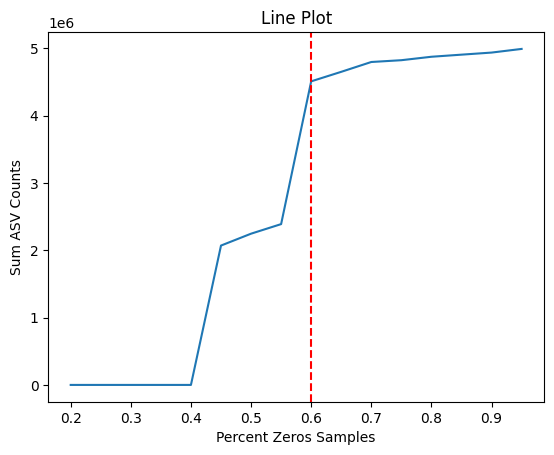

In [24]:
import matplotlib.pyplot as plt

# Extract the x and y values from the DataFrame
x = df['PercentZerosSamples']
y = df['SumASVCounts']

# Create the line plot
plt.plot(x, y)

# First percent zeros value that accounts for more than 50% of the sum of ASV counts
plt.axvline(x=0.6, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Percent Zeros Samples')
plt.ylabel('Sum ASV Counts')
plt.title('Line Plot')

# Display the plot
plt.show()

In [25]:
wallace_q20_fw_closedref_asvs_zeros_filtered_0_6.shape

(18, 377)

In [20]:
kremling_expression_v5_zeros_filtered = count_zeros(kremling_expression_v5_closedref)

Threshold: 188 (threshold * number of columns)


In [26]:
print(wallace_q20_fw_closedref_asvs_zeros_filtered_0_6.shape)
print(kremling_expression_v5_zeros_filtered.shape)

(18, 377)
(19934, 377)


In [27]:
concatenated_df = pd.concat([kremling_expression_v5_zeros_filtered,
                             wallace_q20_fw_closedref_asvs_zeros_filtered_0_6], axis=0)

In [28]:
print(wallace_asvs_q20_fw_closedref_silva_rarefied.shape)
print(wallace_q20_fw_closedref_asvs_zeros_filtered_0_6.shape)
print(kremling_expression_v5_zeros_filtered.shape)
print(concatenated_df.shape)

(1735, 377)
(18, 377)
(19934, 377)
(19952, 377)


In [29]:
concatenated_transposed = concatenated_df.T

In [30]:
from corals.threads import set_threads_for_external_libraries
set_threads_for_external_libraries(n_threads=1)
import numpy as np
from corals.correlation.full.default import cor_full

/media/renato/SSD1TB/Repositories/maize_microbiome_transcriptomics/.venv/lib/python3.10/site-packages/corals/threads.py:48: UserWarning: This function should be called before `numpy` or similar modules are imported.
  warnings.warn("This function should be called before `numpy` or similar modules are imported.")


In [31]:
cor_values = cor_full(concatenated_transposed)
cor_values.shape

(19952, 19952)

In [32]:
cor_values.head()

Name,Zm00001eb371370_T002,Zm00001eb371280_T001,Zm00001eb371250_T001,Zm00001eb371230_T001,Zm00001eb371180_T001,Zm00001eb371100_T001,Zm00001eb371080_T001,Zm00001eb371040_T001,Zm00001eb371030_T001,Zm00001eb371020_T003,...,KF945004.1.1249,KX350177.1.1457,KX301281.1.1226,JF177515.1.1306,JF227982.1.1305,KF101313.1.1306,MH769007.1.1480,KC763792.1.1321,FN421747.1.1368,FN421905.1.1368
Name,,,,,,,,,,,,,,,,,,,,,
Zm00001eb371370_T002,1.000000,0.105545,-0.034053,0.036614,-0.107723,-0.044094,-0.261396,-0.069641,-0.036910,0.124505,...,0.078800,0.047303,-0.001519,0.003640,0.012656,-0.154699,0.006265,-0.099587,-0.049991,-0.069245
Zm00001eb371280_T001,0.105545,1.000000,0.065945,-0.038524,-0.205737,-0.018741,-0.183846,-0.098673,-0.078385,-0.006642,...,0.157483,0.290958,0.066803,-0.044580,-0.000513,0.014645,0.065592,-0.041807,0.014453,-0.006150
Zm00001eb371250_T001,-0.034053,0.065945,1.000000,0.074214,0.101717,0.121454,0.196636,-0.015933,0.064257,-0.003924,...,-0.098769,-0.052695,0.086193,0.045864,0.016773,0.103749,0.097974,-0.006931,0.044423,0.103060
Zm00001eb371230_T001,0.036614,-0.038524,0.074214,1.000000,-0.066954,-0.025793,0.058389,-0.053661,-0.024511,-0.037585,...,-0.061012,-0.026432,0.066191,-0.019645,-0.048443,-0.009315,0.066399,0.015145,0.022833,-0.036365
Zm00001eb371180_T001,-0.107723,-0.205737,0.101717,-0.066954,1.000000,0.283869,0.113083,0.127315,0.056779,-0.017720,...,-0.008873,-0.097430,-0.007326,0.009234,0.027912,0.050330,0.002725,0.030996,0.002957,0.138780


In [33]:
highly_correlated_pairs_df = pd.DataFrame(columns=['feature1', 'feature2', 'correlation'])
correlated_pairs_file = open('correlated_pairs_closedref99silva_asvs0_2_pearson.txt', 'w')

# Find the highly correlated pairs
for i in range(len(cor_values.columns)):
    for j in range(i+1, len(cor_values.columns)):
        if cor_values.columns[i] == cor_values.columns[j] or\
            (cor_values.columns[j].startswith('Zm') and cor_values.columns[i].startswith('Zm')):
            continue
        if ((abs(cor_values.iloc[i, j]) > 0.2) or\
           (abs(cor_values.iloc[i, j]) < -0.2)) and\
            (cor_values.columns[j].startswith('Zm') or cor_values.columns[i].startswith('Zm')):
            pair = (cor_values.columns[i], cor_values.columns[j])
            highly_correlated_pairs_df.loc[len(highly_correlated_pairs_df.index)] = [cor_values.columns[i],
                                                                                     cor_values.columns[j],
                                                                                     cor_values.iloc[i, j]]
            correlated_pairs_file.write(f'{cor_values.columns[i]}\t{cor_values.columns[j]}\t{cor_values.iloc[i, j]}\n')

correlated_pairs_file.close()

## Correlations with OTUs at 99% using SILVA (open reference)

An alternative to closed reference is open-reference, where those sequences not clustering with the reference sequences are grouped separately.

In [ ]:
kremling_expression_key = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/correlations_rnaseq_metataxonomics/0_kremling_expression_key.txt'
sra_run_table_16s = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/16S_wallace2018/SraRunInfo_Wallace_etal_2018.csv'
sra_run_table_rnaseq = '/home/rsantos/Repositories/maize_microbiome_transcriptomics/rnaseq_kremling2018/run_info/SraRunInfo_Kremling_etal_2018.csv'

dict_wallace_kremling_2018 = {}
kremling_expression_key_dict = {}

In [ ]:
with open(kremling_expression_key, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split('\t')
        
        kremling_identifier = fields[0]
        wallace_identifier = fields[1]

        kremling_expression_key_dict[kremling_identifier] = wallace_identifier

In [ ]:
import re

with open(sra_run_table_rnaseq, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split(',')
        fields2 = fields[11].split('_')
        rnaseq_run_id = fields[0]
        sample_id = fields2[1]
        rnaseq_genotype = fields2[2]
        day = ''
        match = re.search(r'\d+', sample_id)
        unmatched_parts = re.split(r'\d+', sample_id)
        day_period = unmatched_parts[0]
        if match:
            day = int(match.group())
        if sample_id.startswith('LMA') and rnaseq_genotype != '#N/A':
            dict_wallace_kremling_2018[fields[11]] = {'run_accession_16s': '',
                                    'run_accession_rnaseq': rnaseq_run_id,
                                    'day': day,
                                    'day_period': day_period,
                                    'genotype_16s': '',
                                    'genotype_rnaseq': rnaseq_genotype}

In [ ]:
rnaseq_samples_with_16s = 0

with open(sra_run_table_16s, 'r') as file:

    _ = file.readline()

    for line in file:
        fields = line.strip().split(',')
        fields2 = fields[11].split('.')
        metataxonomics_run_id = fields[0]
        day = int(fields2[1])
        day_period = fields2[0]
        for key, value in kremling_expression_key_dict.items():
            if value == fields[11]:
                if dict_wallace_kremling_2018[key]['day'] != day:
                    print('Big problem!')
                    print(day, dict_wallace_kremling_2018[key]['day'])
                    print(dict_wallace_kremling_2018[key])
                    print(value, fields[11], key)
                    exit(1)
                if dict_wallace_kremling_2018[key]['day_period'] != day_period:
                    print('Big problem!')
                    if key == '10343927_LMAN8_CML505_CAACAG':
                        #print("It's ok. I know this sample is problematic.")
                        continue
                    else:
                        print(day_period, dict_wallace_kremling_2018[key]['day_period'])
                        print(dict_wallace_kremling_2018[key])
                        print(value, fields[11], key)
                        exit(1)
                dict_wallace_kremling_2018[key]['run_accession_16s'] = metataxonomics_run_id
                rnaseq_samples_with_16s+=1

print(f'{rnaseq_samples_with_16s} sample pairs found.')

In [ ]:
no_16s = 0
for key, value in dict_wallace_kremling_2018.items():
    if value['run_accession_16s'] == '':
        print(key, value)
        no_16s+=1
print(f'{no_16s} samples without 16S data.')

In [ ]:
run2my_sample_id = {}

for key in dict_wallace_kremling_2018:
    if dict_wallace_kremling_2018[key]['run_accession_rnaseq']:
        run2my_sample_id[dict_wallace_kremling_2018[key]['run_accession_rnaseq']] = key
    if dict_wallace_kremling_2018[key]['run_accession_16s']:
        run2my_sample_id[dict_wallace_kremling_2018[key]['run_accession_16s']] = key

In [ ]:
import pandas as pd

# Importing expression data from Kremling et al. 2018 (TPM matrix on Maize v5 using Salmon after cleaning with cutadapt)
kremling_expression_v5 = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/RNAseq/Salmon/Zma2_tpm_matrix.txt', sep='\t')
#kremling_expression_v5 = pd.read_csv('/media/renato/SSD1TB/Projects/UGA_RACS/RNAseq/Salmon/Zma2_tpm_matrix.txt', sep='\t')

# Rename column and reset the index
kremling_expression_v5.set_index('Name', inplace=True)

# Print the dataframe
kremling_expression_v5.head()

In [ ]:
# Rename the columns using the dictionary
kremling_expression_v5 = kremling_expression_v5.rename(columns=run2my_sample_id)
kremling_expression_v5.columns = [str(x) for x in kremling_expression_v5.columns]

kremling_expression_v5.head()

In [ ]:
wallace_asvs_q20_fw_openref_silva = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/clustering/FeatureTable/or99_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

# Rename column and reset the index
wallace_asvs_q20_fw_openref_silva.rename(columns={'OTU ID': 'Name'}, inplace=True)
wallace_asvs_q20_fw_openref_silva.set_index('Name', inplace=True)

# Print the dataframe
wallace_asvs_q20_fw_openref_silva.head(n=2)

In [ ]:
wallace_asvs_q20_fw_openref_silva.shape

In [ ]:
# Rename the columns using the dictionary
wallace_asvs_q20_fw_openref_silva = wallace_asvs_q20_fw_openref_silva.rename(columns=run2my_sample_id)
wallace_asvs_q20_fw_openref_silva.columns = [str(x) for x in wallace_asvs_q20_fw_openref_silva.columns]

In [ ]:
wallace_asvs_q20_fw_openref_silva.head()

In [ ]:
kremling_expression_v5_openref = kremling_expression_v5.filter(items=wallace_asvs_q20_fw_openref_silva.columns)

In [ ]:
wallace_asvs_q20_fw_openref_silva = wallace_asvs_q20_fw_openref_silva.filter(items=kremling_expression_v5_openref.columns)

In [ ]:
print(kremling_expression_v5_openref.shape)
kremling_expression_v5_openref.head()

In [ ]:
print(wallace_asvs_q20_fw_openref_silva.shape)
wallace_asvs_q20_fw_openref_silva.head()

In [ ]:
if wallace_asvs_q20_fw_openref_silva.columns.all() == kremling_expression_v5_openref.columns.all():
    print('Columns are equal!')

In [ ]:
def count_zeros(df, threshold=0.5):
    # Count the number of zeros in each row
    # If the number of zeros is greater than the threshold, remove the row
    threshold_int = int(df.shape[1] * threshold)
    print(f'Threshold: {threshold_int} (threshold * number of columns)')
    zero_counts = df.apply(lambda row: (row == 0).sum(), axis=1)
    return df[zero_counts < threshold_int]

In [ ]:
wallace_asvs_q20_fw_openref_silva_zeros_filtered = count_zeros(wallace_asvs_q20_fw_openref_silva)
kremling_expression_v5_openref_zeros_filtered = count_zeros(kremling_expression_v5_openref)

In [ ]:
print(wallace_asvs_q20_fw_openref_silva_zeros_filtered.shape)
print(kremling_expression_v5_openref_zeros_filtered.shape)

In [ ]:
wallace_asvs_q20_fw_openref_silva_zeros_filtered.index

Taxonomy:

| ID | Taxonomy info |
|----|---------------|
| AAAA02020714.1.1202 | Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Sphingomonas;Oryza sativa Indica Group (long-grained rice) |
| KF101313.1.1306	 | Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Sphingomonas;uncultured bacterium |
| N421747.1.1368	 | Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Sphingomonas;uncultured bacterium |
| MH337967.1.1252	 | Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Novosphingobium;Novosphingobium sp. |
| JF177515.1.1306 | Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Beijerinckiaceae;Methylobacterium-Methylorubrum;uncultured bacterium |
| JQ904048.1.1214 | Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Beijerinckiaceae;Methylobacterium-Methylorubrum;Methylorubrum rhodesianum |
| HM487994.1.1230 | Bacteria;Bacteroidota;Bacteroidia;Cytophagales;Hymenobacteraceae;Hymenobacter;uncultured bacterium |
| fa79d5937f424b58a27843dfff8bdcd4 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas | 0.8876251961000278 |
| 52c0751a4259810b7c12be45c6597335 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae | 0.9974740279969132 |
| 876139714249d7a0203594416545eda6 | d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Micrococcales; f__Microbacteriaceae; g__Microbacterium | 0.9801655748383464 |

## Correlations with OTUs at 99% (de novo clustering)

ASVs generated from dada2 with reads quality 20, only forward reads, after filtering out mit, chloroplast and euk, were clustered into OTUs at 99% using a de novo method (pre-processing steps are described on GitLab).

Here, I (RACS) import this table:

In [ ]:
wallace_asvs_q20_fw_denovo99_silva = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/clustering/FeatureTable/denovo_99_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

# Rename column and reset the index
wallace_asvs_q20_fw_denovo99_silva.rename(columns={'OTU ID': 'Name'}, inplace=True)
wallace_asvs_q20_fw_denovo99_silva.set_index('Name', inplace=True)

# Print the dataframe
print(wallace_asvs_q20_fw_denovo99_silva.shape)
wallace_asvs_q20_fw_denovo99_silva.head(n=2)

In [ ]:
# Rename the columns using the dictionary
wallace_asvs_q20_fw_denovo99_silva = wallace_asvs_q20_fw_denovo99_silva.rename(columns=run2my_sample_id)
wallace_asvs_q20_fw_denovo99_silva.columns = [str(x) for x in wallace_asvs_q20_fw_denovo99_silva.columns]

wallace_asvs_q20_fw_denovo99_silva.head()

In [ ]:
kremling_expression_v5_denovo99 = kremling_expression_v5.filter(items=wallace_asvs_q20_fw_denovo99_silva.columns)

In [ ]:
wallace_asvs_q20_fw_denovo99_silva = wallace_asvs_q20_fw_denovo99_silva.filter(items=kremling_expression_v5_denovo99.columns)

In [ ]:
print(kremling_expression_v5_denovo99.shape)
kremling_expression_v5_denovo99.head()

In [ ]:
print(wallace_asvs_q20_fw_denovo99_silva.shape)
wallace_asvs_q20_fw_denovo99_silva.head()

In [ ]:
if wallace_asvs_q20_fw_denovo99_silva.columns.all() == kremling_expression_v5_denovo99.columns.all():
    print('Columns are equal!')

In [ ]:
wallace_asvs_q20_fw_denovo99_silva_zeros_filtered = count_zeros(wallace_asvs_q20_fw_denovo99_silva)
kremling_expression_v5_denovo99_zeros_filtered = count_zeros(kremling_expression_v5_denovo99)

In [ ]:
print(wallace_asvs_q20_fw_denovo99_silva_zeros_filtered.shape)
print(kremling_expression_v5_denovo99_zeros_filtered.shape)

In [ ]:
wallace_asvs_q20_fw_denovo99_silva_zeros_filtered.index

Taxonomy:

| ID | Taxonomy info |
|----|---------------|
| 232ad9e267688a5d573112b4855bac96 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas | 0.9046232311280543 |
| 1674323e4fe615dc003edd628305bc9f | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae | 0.9981399823237278 |
| d8fac1aa74436b8041e29a3237da7955 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae; g__Methylobacterium-Methylorubrum | 0.934485077586803 |
| d7386797b5be1ee26245561ee11ce7d4 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae; g__Methylobacterium-Methylorubrum | 0.9452843145859641 |
| 225bc1cb152b786927ca748b98403d94 | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Cytophagales; f__Hymenobacteraceae; g__Hymenobacter | 0.9979727897056238 |
| 876139714249d7a0203594416545eda6 | d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Micrococcales; f__Microbacteriaceae; g__Microbacterium | 0.9801655748383464 |
| a6c946adedd20c184243c5a9580120c7 | d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales | 0.9986316010935418 |
| 089df82153e0fc89ce4dd33e2fb967a9 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas | 0.9945668726254755 |
| 015c66180ecdb90b731d72f74a541767 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Rhizobiaceae; g__Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium | 0.8336974343250252 |

## Correlations with OTUs at 97% (de novo clustering)

ASVs generated from dada2 with reads quality 20, only forward reads, were clustered into OTUs at 97% using a de novo method (pre-processing steps are described on GitLab).

Here, I (RACS) import this table:

In [ ]:
wallace_asvs_q20_fw_denovo97_silva = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/clustering/FeatureTable/denovo_97_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

# Rename column and reset the index
wallace_asvs_q20_fw_denovo97_silva.rename(columns={'OTU ID': 'Name'}, inplace=True)
wallace_asvs_q20_fw_denovo97_silva.set_index('Name', inplace=True)

# Print the dataframe
print(wallace_asvs_q20_fw_denovo97_silva.shape)
wallace_asvs_q20_fw_denovo97_silva.head(n=2)

In [ ]:
# Rename the columns using the dictionary
wallace_asvs_q20_fw_denovo97_silva = wallace_asvs_q20_fw_denovo97_silva.rename(columns=run2my_sample_id)
wallace_asvs_q20_fw_denovo97_silva.columns = [str(x) for x in wallace_asvs_q20_fw_denovo97_silva.columns]

In [ ]:
wallace_asvs_q20_fw_denovo97_silva.head()

In [ ]:
kremling_expression_v5_denovo97 = kremling_expression_v5.filter(items=wallace_asvs_q20_fw_denovo97_silva.columns)

In [ ]:
wallace_asvs_q20_fw_denovo97_silva = wallace_asvs_q20_fw_denovo97_silva.filter(items=kremling_expression_v5_denovo97.columns)

In [ ]:
print(kremling_expression_v5_denovo97.shape)
kremling_expression_v5_denovo97.head()

In [ ]:
print(wallace_asvs_q20_fw_denovo97_silva.shape)
wallace_asvs_q20_fw_denovo97_silva.head()

In [ ]:
if wallace_asvs_q20_fw_denovo97_silva.columns.all() == kremling_expression_v5_denovo97.columns.all():
    print('Columns are equal!')

In [ ]:
wallace_asvs_q20_fw_denovo97_silva_zeros_filtered = count_zeros(wallace_asvs_q20_fw_denovo97_silva)
kremling_expression_v5_denovo97_zeros_filtered = count_zeros(kremling_expression_v5_denovo97)

In [ ]:
print(wallace_asvs_q20_fw_denovo97_silva_zeros_filtered.shape)
print(kremling_expression_v5_denovo97_zeros_filtered.shape)

In [ ]:
wallace_asvs_q20_fw_denovo97_silva_zeros_filtered.index

Taxonomy:

| ID | Taxonomy info |
|----|---------------|
| 232ad9e267688a5d573112b4855bac96 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas |
| d8fac1aa74436b8041e29a3237da7955 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae; g__Methylobacterium-Methylorubrum |
| d7386797b5be1ee26245561ee11ce7d4 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Beijerinckiaceae; g__Methylobacterium-Methylorubrum |
| 225bc1cb152b786927ca748b98403d94 | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Cytophagales; f__Hymenobacteraceae; g__Hymenobacter |
| 876139714249d7a0203594416545eda6 | d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Micrococcales; f__Microbacteriaceae; g__Microbacterium |
| a6c946adedd20c184243c5a9580120c7 | d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Enterobacterales |
| 9513fb99947860ebff7ca131f8cee160 | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Weeksellaceae; g__Chryseobacterium |
| 015c66180ecdb90b731d72f74a541767 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rhizobiales; f__Rhizobiaceae; g__Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium |
| d256dc8e2d15b37c97e829c7f6fe5d23 | d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Moraxellaceae; g__Acinetobacter |
| acca42a5ffae1505efc844b610370e80 | d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pseudomonadales; f__Pseudomonadaceae; g__Pseudomonas |
| b1bda8871b67d26c1b0c1ad6d5c57c56 | d__Bacteria; p__Actinobacteriota; c__Actinobacteria; o__Propionibacteriales; f__Nocardioidaceae; g__Nocardioides |

In [ ]:
wallace_asvs_q20_fw_denovo97_silva_zeros_filtered

In [ ]:
kremling_expression_v5_denovo97_zeros_filtered.head(n=30)

In [ ]:
import matplotlib.pyplot as plt

# Generate histogram
plt.hist(kremling_expression_v5_denovo97_zeros_filtered.loc['Zm00001eb370180_T002'][kremling_expression_v5_denovo97_zeros_filtered.loc['Zm00001eb370180_T002'] > 10],
         bins=100)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()

## Correlations with OTUs at 85% (de novo clustering)

In [ ]:
wallace_asvs_q20_fw_denovo85_silva = pd.read_csv('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Qiime2/clustering/FeatureTable/denovo_85_q20_fw_feature-table.tsv',
                           sep='\t', comment='#')

# Rename column and reset the index
wallace_asvs_q20_fw_denovo85_silva.rename(columns={'OTU ID': 'Name'}, inplace=True)
wallace_asvs_q20_fw_denovo85_silva.set_index('Name', inplace=True)

# Print the dataframe
print(wallace_asvs_q20_fw_denovo85_silva.shape)
wallace_asvs_q20_fw_denovo85_silva.head(n=2)

In [ ]:
# Rename the columns using the dictionary
wallace_asvs_q20_fw_denovo85_silva = wallace_asvs_q20_fw_denovo85_silva.rename(columns=run2my_sample_id)
wallace_asvs_q20_fw_denovo85_silva.columns = [str(x) for x in wallace_asvs_q20_fw_denovo85_silva.columns]

In [ ]:
wallace_asvs_q20_fw_denovo85_silva.head()

In [ ]:
kremling_expression_v5_denovo85 = kremling_expression_v5.filter(items=wallace_asvs_q20_fw_denovo85_silva.columns)

In [ ]:
wallace_asvs_q20_fw_denovo85_silva = wallace_asvs_q20_fw_denovo85_silva.filter(items=kremling_expression_v5_denovo85.columns)

In [ ]:
print(kremling_expression_v5_denovo85.shape)
kremling_expression_v5_denovo85.head()

In [ ]:
print(wallace_asvs_q20_fw_denovo85_silva.shape)
wallace_asvs_q20_fw_denovo85_silva.head()

In [ ]:
if wallace_asvs_q20_fw_denovo85_silva.columns.all() == kremling_expression_v5_denovo85.columns.all():
    print('Columns are equal!')

In [ ]:
wallace_asvs_q20_fw_denovo85_silva_zeros_filtered = count_zeros(wallace_asvs_q20_fw_denovo85_silva)
kremling_expression_v5_denovo85_zeros_filtered = count_zeros(kremling_expression_v5_denovo85)

In [ ]:
print(wallace_asvs_q20_fw_denovo85_silva_zeros_filtered.shape)
print(kremling_expression_v5_denovo85_zeros_filtered.shape)

In [ ]:
wallace_asvs_q20_fw_denovo85_silva_zeros_filtered.index

Taxonomy:

| ID | Taxonomy info |
|----|---------------|
| 232ad9e267688a5d573112b4855bac96 | d__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__Sphingomonas |
| 225bc1cb152b786927ca748b98403d94 | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Cytophagales; f__Hymenobacteraceae; g__Hymenobacter |
| 9513fb99947860ebff7ca131f8cee160 | d__Bacteria; p__Bacteroidota; c__Bacteroidia; o__Flavobacteriales; f__Weeksellaceae; g__Chryseobacterium |
| 3a3a197520db6ad8f425e4d0935e5f23 | d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Burkholderiales; f__Comamonadaceae |
| 343621515628bbb16a8aa3cfbf103abe | d__Bacteria; p__Actinobacteriota; c__Actinobacteria |